In [1]:
import torch
from dpm.models import pca, PCA
import numpy as np
from scipy.stats import ortho_group
from dpm.models.decomposition import ProbabilisticPCA,PPCA_Variational, PPCA_Variational_V2
from dpm.visualize import plot_stats

In [2]:
def build_toy_dataset(N, D, K, sigma=1):
    z_train = np.random.normal(0.0, 1.0, size=(N, K))
    z_train = z_train - z_train.mean(0)
    w = ortho_group.rvs(D)[:, :K]
    w = torch.tensor(w).float()
    return torch.tensor(z_train).float().mm(w.t()), w, z_train

N = 5000  # number of data points
D = 2  # data dimensionality
K = 1  # latent dimensionality

x_train, w, z_train = build_toy_dataset(N, D, K)
x_train.shape, w.shape

(torch.Size([5000, 2]), torch.Size([2, 1]))

In [3]:
w

tensor([[-0.2778],
        [ 0.9607]])

In [4]:
ppca = ProbabilisticPCA(2, 1, noise=0.0001)
variational_dist = PPCA_Variational_V2(ppca)

In [5]:
ppca.num_parameters

2

In [6]:
ppca.W

Parameter containing:
tensor([[0.8863],
        [0.9396]], requires_grad=True)

In [7]:
stats = None

In [8]:
stats = ppca.fit(x_train, variational_dist, stats=stats, epochs=1000)

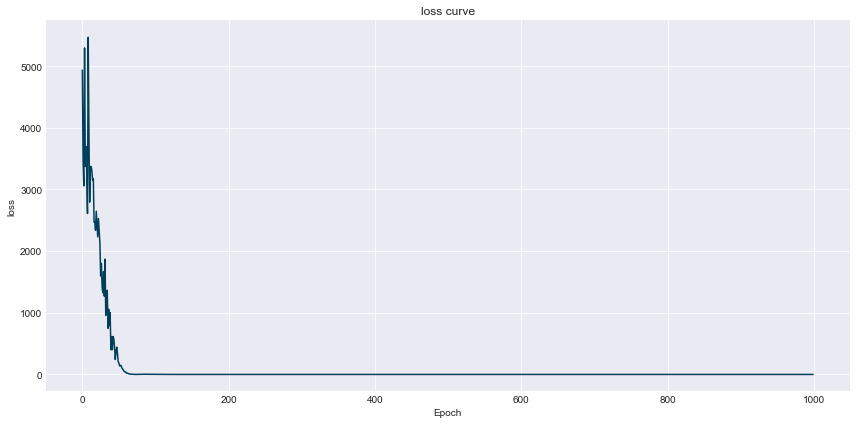

In [9]:
plot_stats(stats)

In [10]:
ppca.W / (ppca.W ** 2).sum()

tensor([[-0.2783],
        [ 0.9616]], grad_fn=<DivBackward0>)

In [11]:
w / (w ** 2).sum()

tensor([[-0.2778],
        [ 0.9607]])

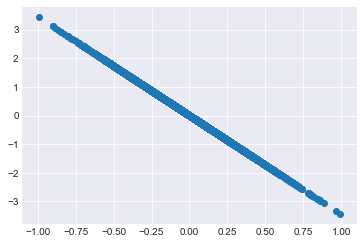

In [12]:
from matplotlib import pyplot as plt
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

In [13]:
variational_dist.sample(x_train).shape

torch.Size([5000, 1])

In [14]:
ppca.W.shape

torch.Size([2, 1])

In [15]:
x_train, ppca.sample(variational_dist.sample(x_train))

(tensor([[ 0.1118, -0.3866],
         [ 0.0105, -0.0363],
         [-0.2899,  1.0027],
         ...,
         [-0.0958,  0.3312],
         [ 0.2003, -0.6928],
         [ 0.0704, -0.2437]]), tensor([[ 0.1090, -0.3689],
         [ 0.0201, -0.0264],
         [-0.2874,  1.0078],
         ...,
         [-0.1104,  0.3401],
         [ 0.2056, -0.7216],
         [ 0.0560, -0.2241]], grad_fn=<SqueezeBackward1>))

In [16]:
ppca.sample(batch_size=64)

ValueError: PPCA has no prior distribution to sample latents from, please set tau

In [17]:
ppca.transform(x_train)

tensor([[-1.7802],
        [-0.4422],
        [-0.6599],
        ...,
        [ 0.1745],
        [ 0.8439],
        [-0.5100]], grad_fn=<MmBackward>)

In [18]:
z_train

array([[-0.94614739],
       [ 0.372507  ],
       [-0.70636726],
       ...,
       [-0.35653943],
       [ 0.60019334],
       [ 1.18275165]])

In [112]:
def pca(X, k=2):
    if not isinstance(X, torch.Tensor):
        X = torch.tensor(X).float()
    X = X - X.mean(dim=0, keepdim=True)
    U, S, V = torch.svd(X)
#     return U, S, V
    return torch.mm(X, V[:k].t())

In [113]:
ret = pca(x_train, 1)


In [114]:
ret

tensor([[-0.7609],
        [-0.0852],
        [-0.8552],
        ...,
        [-0.9893],
        [-0.6913],
        [ 0.4998]])

In [107]:
U,S,V = ret

In [108]:
x_train.mm(w)

tensor([[-0.7609],
        [-0.0852],
        [-0.8552],
        ...,
        [-0.9893],
        [-0.6913],
        [ 0.4998]])

In [109]:
torch.mm(x_train, V[:1].t())

tensor([[-0.7609],
        [-0.0852],
        [-0.8552],
        ...,
        [-0.9893],
        [-0.6913],
        [ 0.4998]])

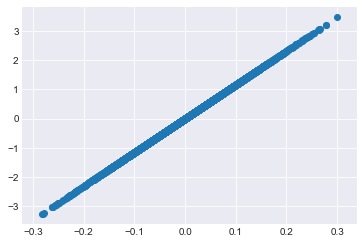

In [98]:
from matplotlib import pyplot as plt
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

In [8]:
ret, _ = torch.sort(ret)

In [9]:
x_train, _ = torch.sort(x_train)

In [10]:
(ret.abs() - x_train.float().abs()).pow(2).sum()

tensor(65.5842)

In [41]:
m = PCA(1)

In [44]:
ret = m.fit_transform(x_train)
m.V

tensor([[-0.3235,  0.9462],
        [-0.9462, -0.3235]])

In [13]:
x_train, _ = torch.sort(x_train)

In [14]:
ret, _ = torch.sort(ret)

In [15]:
(ret.abs() - x_train.float().abs()).pow(2).sum()

tensor(65.5842)

In [20]:
x_train.shape

torch.Size([5000, 2])

NameError: name 'Normal' is not defined